In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime 

In [2]:
covid_df=pd.read_csv('Covid_Data/covid_19_india.csv')
covid_df.head(50)
covid_df.columns



Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [4]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [5]:
covid_df.iloc[1000:1100]  # Gives out the row from the particular index
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [6]:
covid_df['Date']=pd.to_datetime(covid_df['Date'],format='%Y-%m-%d')# converting the columns into date and time format 
covid_df.head(50)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15086 non-null  float64       
 1   Date                      15086 non-null  datetime64[ns]
 2   Time                      15086 non-null  object        
 3   State/UnionTerritory      15086 non-null  object        
 4   ConfirmedIndianNational   15086 non-null  object        
 5   ConfirmedForeignNational  15086 non-null  object        
 6   Cured                     15086 non-null  float64       
 7   Deaths                    15086 non-null  float64       
 8   Confirmed                 15086 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.0+ MB


In [7]:
covid_df.loc[covid_df['Date']=="2020-01-30"]


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0


In [8]:
covid_filtered=covid_df.drop(["Time","ConfirmedIndianNational","ConfirmedForeignNational"],axis=1)
covid_filtered.drop(['Sno'],inplace=True,axis=1)
covid_filtered


,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0
...,...,...,...,...,...
15109,NaT,NaN,NaN,NaN,NaN
15110,NaT,NaN,NaN,NaN,NaN
15111,NaT,NaN,NaN,NaN,NaN
15112,NaT,NaN,NaN,NaN,NaN


In [9]:
covid_filtered.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


# Q1) Need To find the Active Cases of Covid_19

In [10]:
# Algo used is Confiremd-(Cured+Death)=Active_cases : Active cases per day
# But there so many nan values for the datasets 
covid_filtered['Active_cases']=covid_filtered['Confirmed']-covid_filtered.iloc[:,2:4].sum(axis=1)# Her axis=1 means the operations are occuring row wise 
covid_filtered.tail(40)



,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
15074,2021-05-19,Nagaland,14079.0,228.0,18714.0,4407.0
15075,2021-05-19,Odisha,536595.0,2357.0,633302.0,94350.0
15076,2021-05-19,Puducherry,69060.0,1212.0,87749.0,17477.0
15077,2021-05-19,Punjab,427058.0,12317.0,511652.0,72277.0
15078,2021-05-19,Rajasthan,713129.0,7080.0,879664.0,159455.0
15079,2021-05-19,Sikkim,8427.0,212.0,11689.0,3050.0
15080,2021-05-19,Tamil Nadu,1403052.0,18369.0,1664350.0,242929.0
15081,2021-05-19,Telangana,485644.0,3012.0,536766.0,48110.0
15082,2021-05-19,Tripura,36402.0,450.0,42776.0,5924.0
15083,2021-05-19,Uttarakhand,214426.0,5132.0,295790.0,76232.0


# CLEANING UP THE DATA (DROPPING THE ROWS WITH NAN VALUES)


In [11]:
# Finding the rows with one or more NAN values hiiden in the rows 
nan_df=covid_filtered[covid_filtered.isna().any(axis=1)]
covid_filtered=covid_filtered.dropna(how='any')
covid_filtered.tail()


,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
15081,2021-05-19,Telangana,485644.0,3012.0,536766.0,48110.0
15082,2021-05-19,Tripura,36402.0,450.0,42776.0,5924.0
15083,2021-05-19,Uttarakhand,214426.0,5132.0,295790.0,76232.0
15084,2021-05-19,Uttar Pradesh,1483249.0,18072.0,1637663.0,136342.0
15085,2021-05-19,West Bengal,1026492.0,13576.0,1171861.0,131793.0


# Plotting the Trends and Visualisation after cleaning 


In [12]:
# Developing a pivot table and to find the cases statewise 
statewise=pd.pivot_table(covid_filtered,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc='max')#It is going to aggregate all the confirmed,deaths,and cured cases and find out the maximum values of each state
statewise['Recovery_rate']=statewise['Cured']*100/statewise['Confirmed']
statewise['Mortalilty_rate']=statewise['Deaths']*100/statewise['Confirmed']
statewise=statewise.sort_values(by='Confirmed',ascending=False)
statewise.style.background_gradient(cmap='YlGnBu')

,Confirmed,Cured,Deaths,Recovery_rate,Mortalilty_rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


In [13]:
# Top Active cases states
top_active_cases=covid_filtered.groupby('State/UnionTerritory').max()[['Active_cases','Deaths']].sort_values(by=['Active_cases'],ascending=False).reset_index()
top_active_cases

,State/UnionTerritory,Active_cases,Deaths
0,Maharashtra,701614.0,83777.0
1,Karnataka,605515.0,22838.0
2,Kerala,445692.0,6612.0
3,Uttar Pradesh,310783.0,18072.0
4,Tamil Nadu,242929.0,18369.0
5,Rajasthan,212753.0,7080.0
6,Andhra Pradesh,211554.0,9580.0
7,Gujarat,148297.0,9269.0
8,West Bengal,131948.0,13576.0
9,Chhattisgarh,131245.0,12036.0


Text(0, 0.5, 'Active cases')

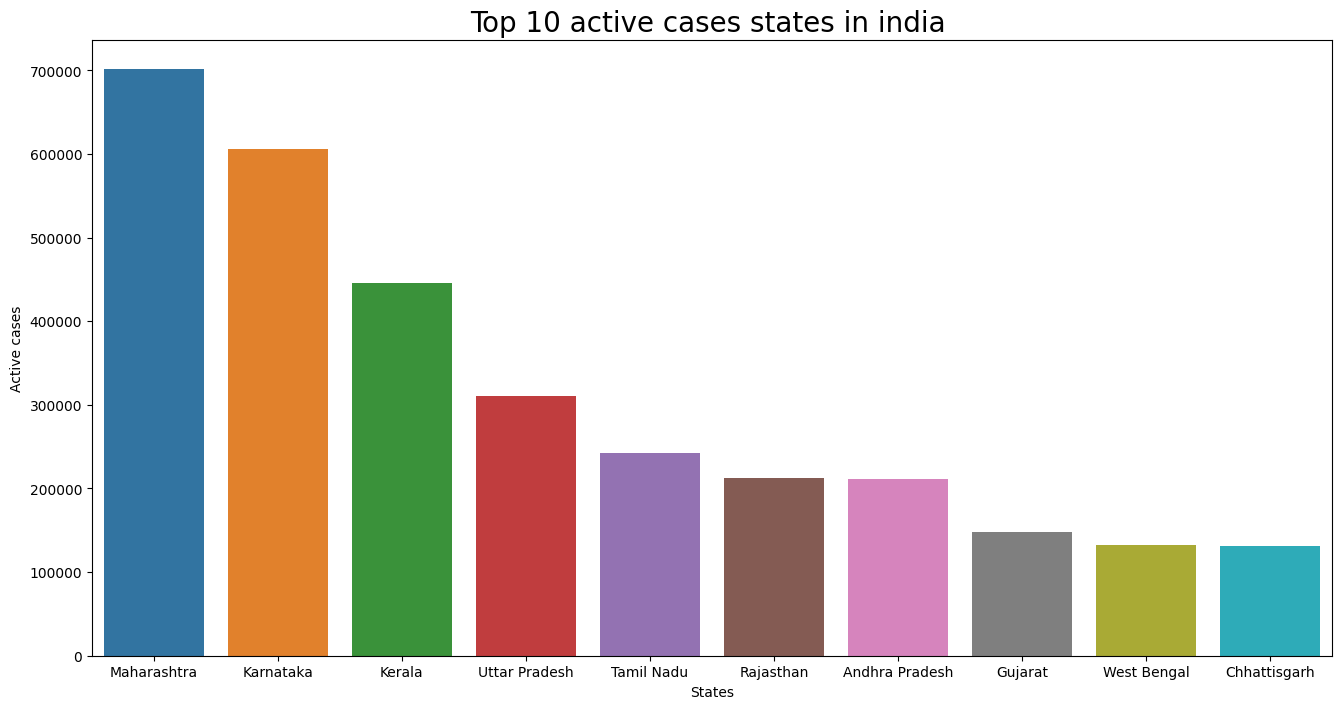

In [14]:
# plotting the barplot of the top 10 active cases states
fig=plt.figure(figsize=(16,8))
plt.title("Top 10 active cases states in india ",size=20)
sns.barplot(x='State/UnionTerritory',y='Active_cases',hue='State/UnionTerritory',data=top_active_cases.iloc[:10],linewidth=2)
plt.xlabel('States')
plt.ylabel('Active cases')



Text(0, 0.5, 'Death Cases')

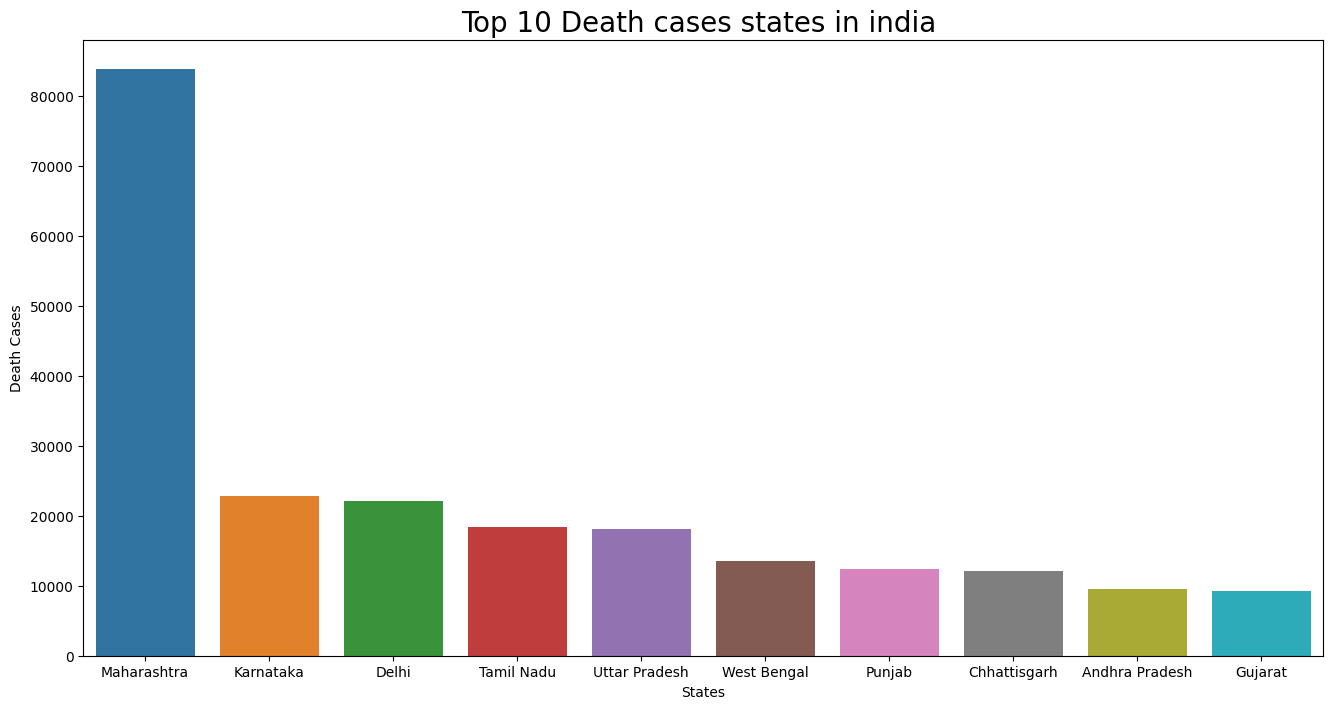

In [15]:
# Top states with highest number of deaths 
top_death_cases=covid_filtered.groupby('State/UnionTerritory').max()[['Active_cases','Deaths']].sort_values(by=['Deaths'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,8))
plt.title("Top 10 Death cases states in india ",size=20)
sns.barplot(x='State/UnionTerritory',y='Deaths',hue='State/UnionTerritory',data=top_death_cases.iloc[:10],linewidth=2)
plt.xlabel('States')
plt.ylabel('Death Cases')

Text(0, 0.5, 'Confirmed_Cases')

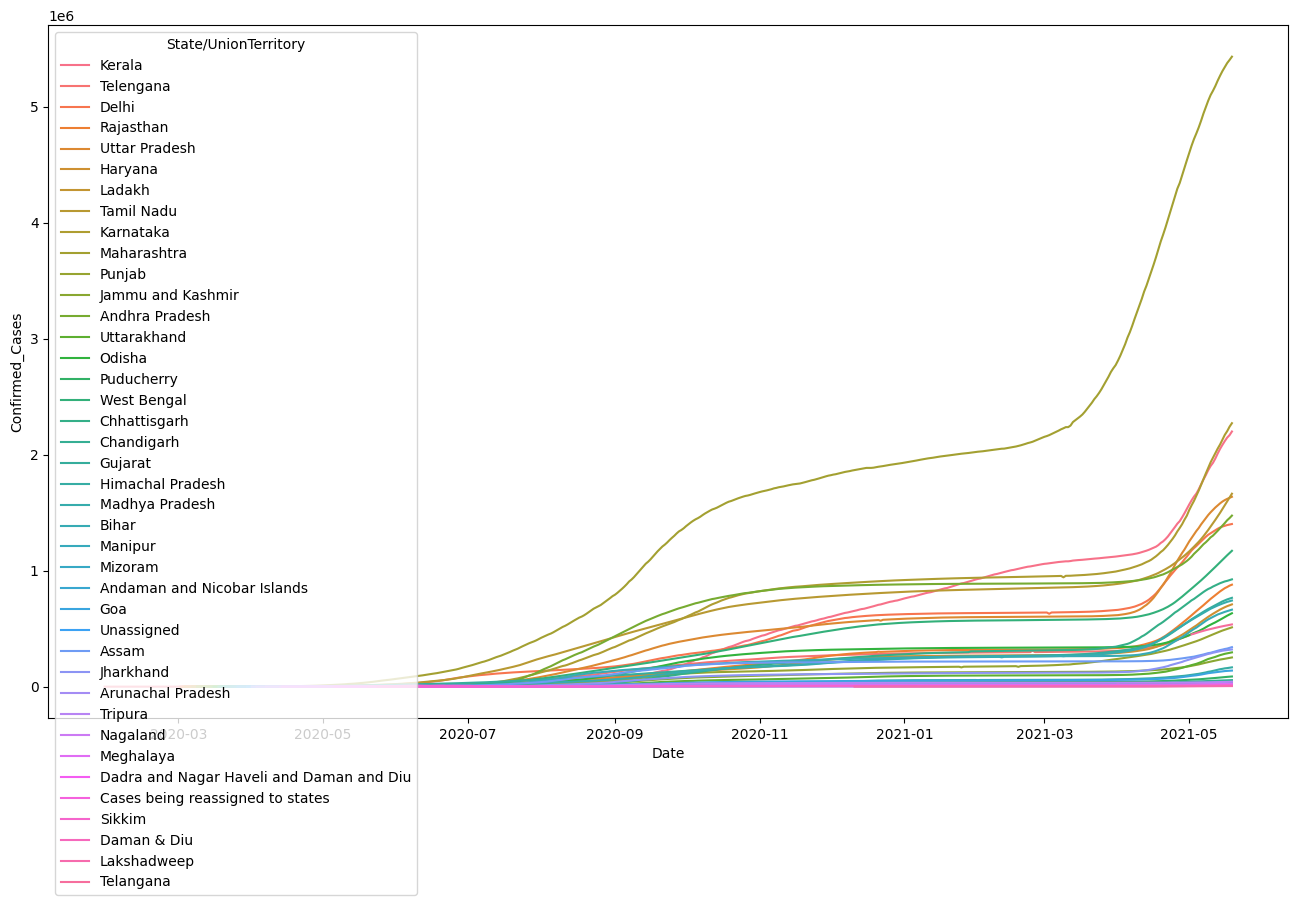

In [16]:
# Plotting the Growth Trend of COVID-19 cases among Different states
fig=plt.figure(figsize=(16,9))
sns.lineplot(y='Confirmed',x='Date',data=covid_filtered,hue='State/UnionTerritory',)
plt.xlabel('Date')
plt.ylabel('Confirmed_Cases')

Text(0, 0.5, 'Confirmed_Cases')

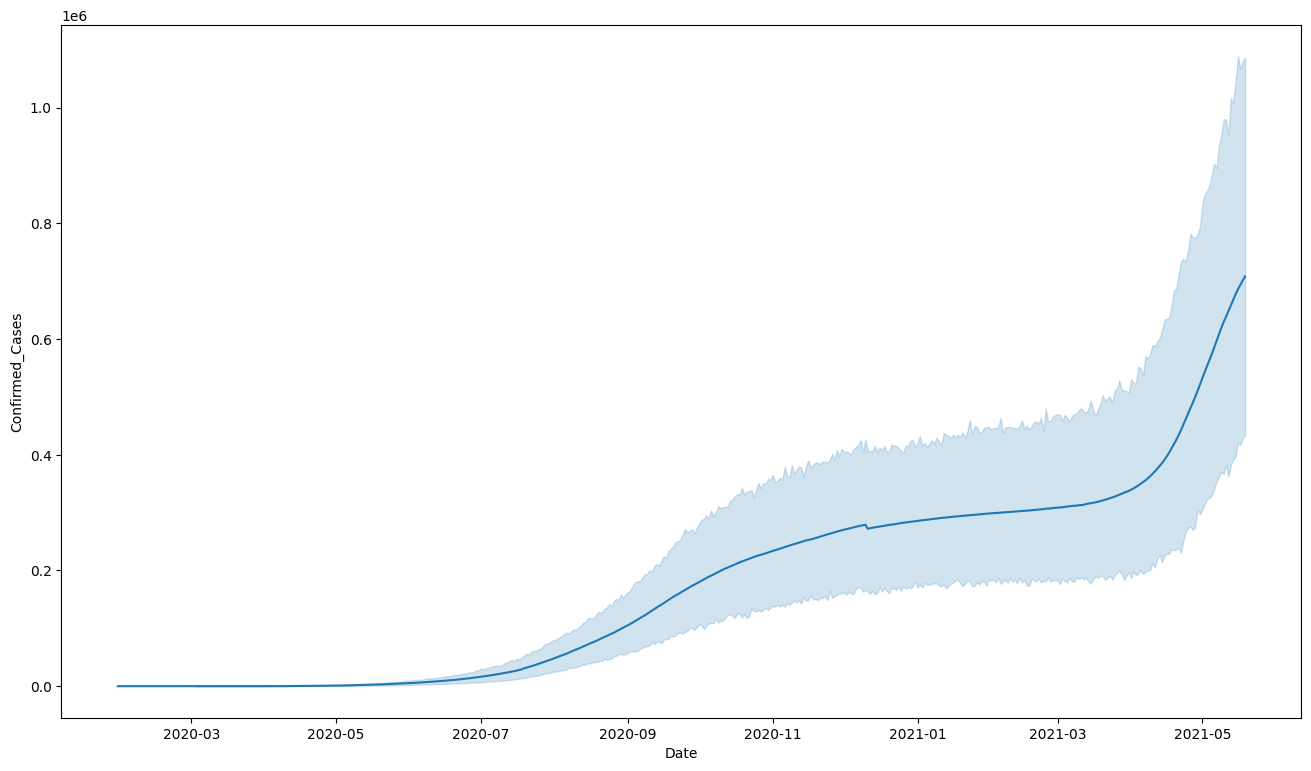

In [17]:
# Growth trend of confirmed cases across india 
fig=plt.figure(figsize=(16,9))
sns.lineplot(y='Confirmed',x='Date',data=covid_filtered)
plt.xlabel('Date')
plt.ylabel('Confirmed_Cases')

Text(0.5, 1.0, 'Top 5 Affected States Covid-19 growth')

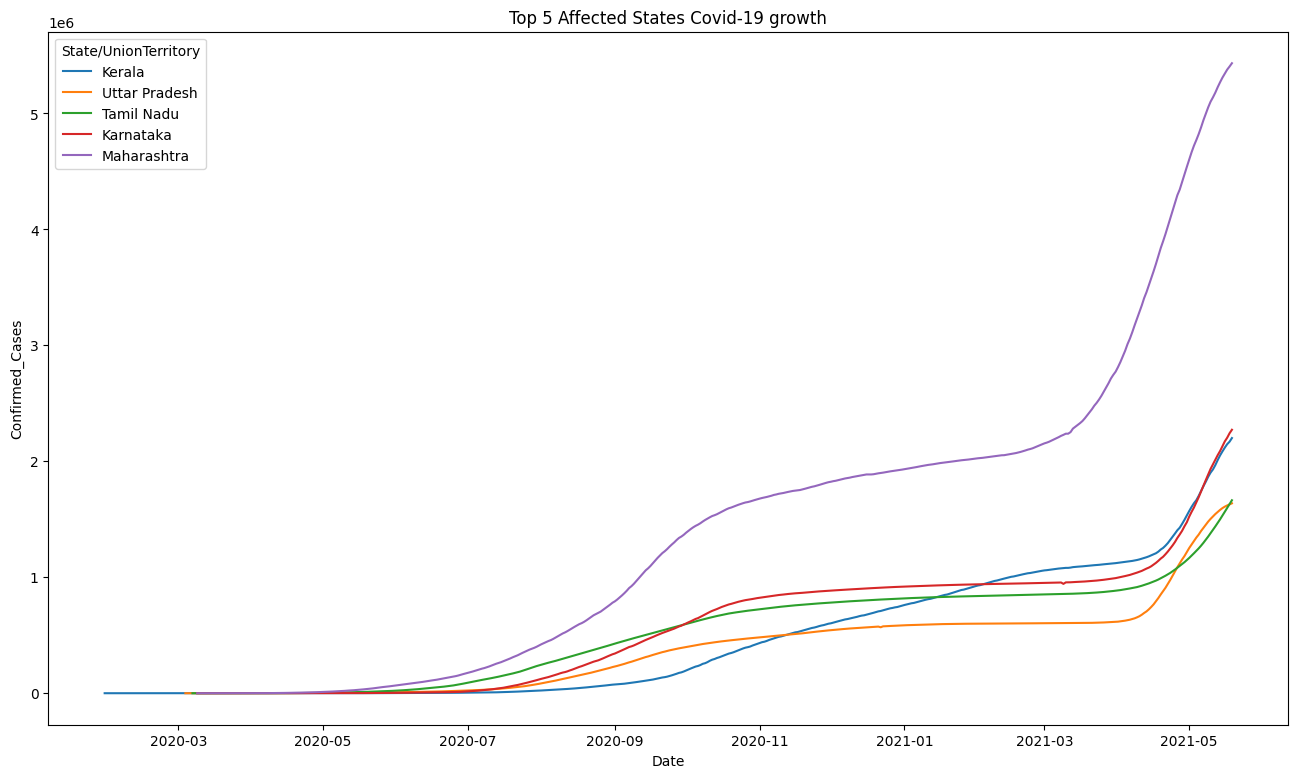

In [18]:
# Trend of top 5 active cases states
fig=plt.figure(figsize=(16,9))
sns.lineplot(y='Confirmed',x='Date',data=covid_filtered[covid_filtered['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Uttar Pradesh','Tamil Nadu'])],hue='State/UnionTerritory')
plt.xlabel('Date')
plt.ylabel('Confirmed_Cases')
plt.title('Top 5 Affected States Covid-19 growth')


# Vaccine Data


In [19]:
vaccine_df=pd.read_csv('Covid_data/covid_vaccine_statewise.csv')
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [21]:
# As we can see so many columns of vaccine data set is empty like male,female,transgender etc..
# So now we have to drop the columns in which nan/missing values are present 
vaccine_df.rename(columns={'Updated On':'Vaccine_date'},inplace=True)


In [22]:
# Checking for the columns which have the null values 
vaccine_df.isnull().sum()


Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [23]:
# Dropping the columns 
vaccine_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],inplace=True,axis=1)


In [24]:
vaccine_df

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# checking the ratios of male and female vaccination percentage 
male=vaccine_df['Male(Individuals Vaccinated)'].sum()
female=vaccine_df['Female(Individuals Vaccinated)'].sum()
px.pie(names=["Male","Female"],values=[male,female],title="Male Vs Female Vaccination")


In [29]:
# Clearing out the data where state name is not given/Written India for finding the most vaccinated state 
vaccine=vaccine_df[vaccine_df['State']!='India']
vaccine

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Finding out the most vaccinated state
most_vacc=vaccine.groupby('State')['Total Individuals Vaccinated'].sum(['Total Individuals Vaccinated']).sort_values(ascending=False).to_frame()
most_vacc

,Total Individuals Vaccinated
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08
Karnataka,8.685235e+08
Madhya Pradesh,7.718640e+08
Bihar,6.608479e+08
Kerala,6.208252e+08


Text(0, 0.5, 'Total Vaccination')

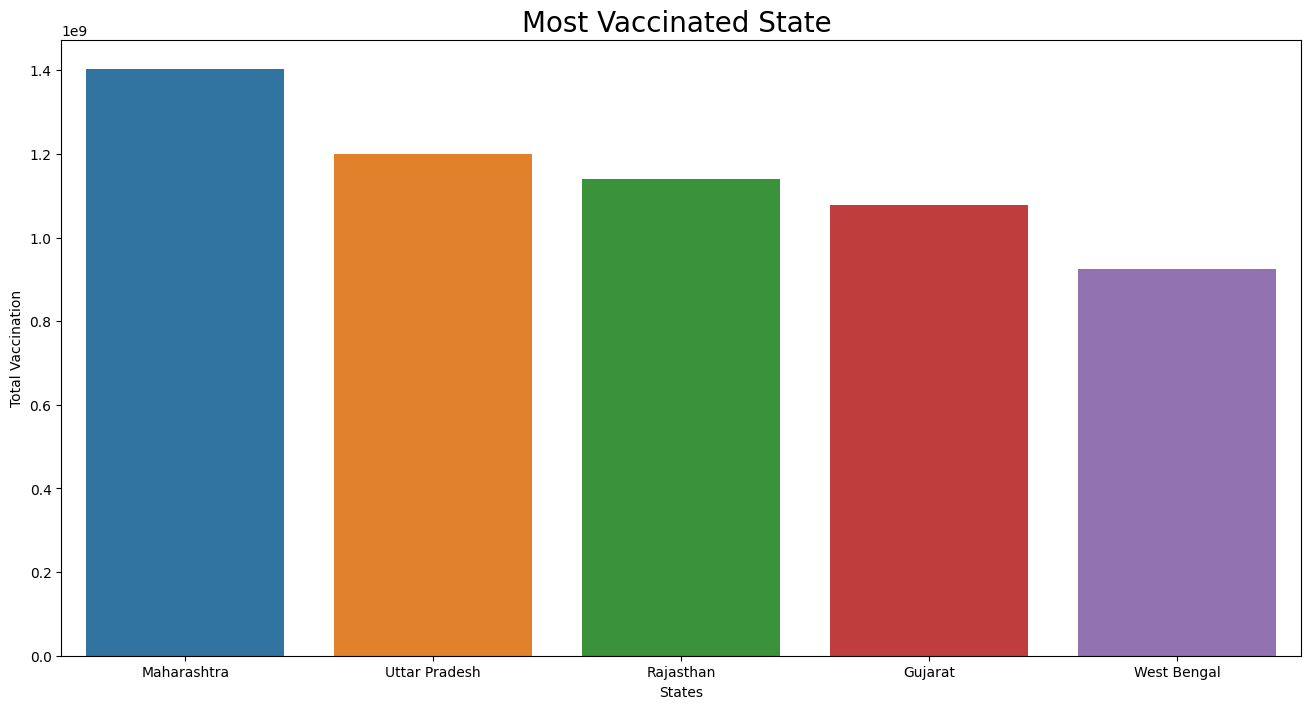

In [40]:
# Top 5 most vaccinated states of india
fig=plt.figure(figsize=(16,8))
plt.title("Most Vaccinated State ",size=20)
sns.barplot(x='State',y='Total Individuals Vaccinated',hue='State',data=most_vacc.iloc[:5])
plt.xlabel('States')
plt.ylabel('Total Vaccination')